In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Read the dataset to the python environment.

In [2]:
data=pd.read_excel("iris.xls")
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
data.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [5]:
#missing values filled with median

In [6]:
data['SL'] = data['SL'].fillna(data['SL'].median())
data['SW'] = data['SW'].fillna(data['SW'].median())
data['PL'] = data['PL'].fillna(data['PL'].median())

In [7]:
data.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [9]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

Text(0.5, 1.0, 'Boxplot of SL column')

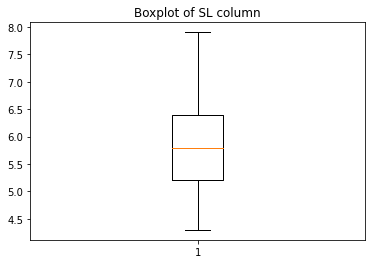

In [11]:
plt.boxplot(data['SL'])
plt.title('Boxplot of SL column')

Text(0.5, 1.0, 'Boxplot of SW column')

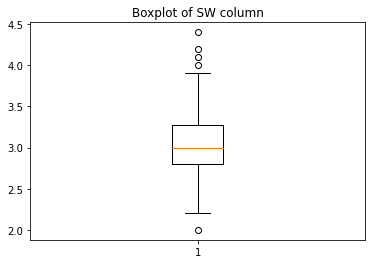

In [12]:
plt.boxplot(data['SW'])
plt.title('Boxplot of SW column')

In [18]:
#Computation of Q1,Q2,Q3
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')
print(Q1,Q2,Q3)
#Computation of IQR,lower limit and upper limit
IQR=Q3-Q1
ll=Q1-1.5*IQR
print("lower limit",ll)
ul=Q3+1.5*IQR
print("upper limit",ul)
#Identifying outlier values
outliers=[]
for x in data['SW']:
    if (x>ul)or(x<ll):
        outliers.append(x)
print(outliers)

2.8 3.0 3.25
lower limit 2.1249999999999996
upper limit 3.9250000000000003
[4.0, 4.4, 4.1, 4.2, 2.0]


In [20]:
index=(data['SW']>ul ) | (data['SW']<ll)
i=data.loc[index].index
print(i)

Int64Index([14, 15, 32, 33, 60], dtype='int64')


In [21]:
data.drop(i,inplace=True)
print(data)

      SL   SW    PL   PW  Classification
0    5.1  3.5  1.40  0.2     Iris-setosa
1    4.9  3.0  1.40  0.2     Iris-setosa
2    5.8  3.2  1.30  0.2     Iris-setosa
3    4.6  3.1  1.50  0.2     Iris-setosa
4    5.0  3.6  1.40  0.2     Iris-setosa
..   ...  ...   ...  ...             ...
145  6.7  3.0  5.20  2.3  Iris-virginica
146  6.3  2.5  5.00  1.9  Iris-virginica
147  6.5  3.0  4.35  2.0  Iris-virginica
148  6.2  3.4  5.40  2.3  Iris-virginica
149  5.9  3.0  5.10  1.8  Iris-virginica

[145 rows x 5 columns]


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              145 non-null    float64
 1   SW              145 non-null    float64
 2   PL              145 non-null    float64
 3   PW              145 non-null    float64
 4   Classification  145 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


Text(0.5, 1.0, 'Boxplot of SW column')

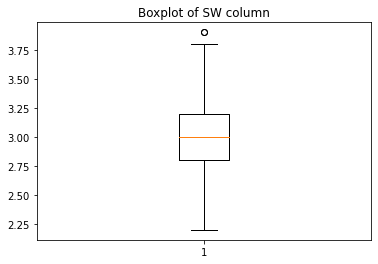

In [23]:
plt.boxplot(data['SW'])
plt.title('Boxplot of SW column')

Text(0.5, 1.0, 'Boxplot of PL column')

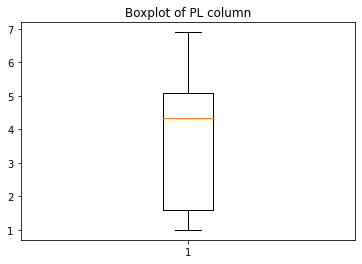

In [16]:
plt.boxplot(data['PL'])
plt.title('Boxplot of PL column')


Text(0.5, 1.0, 'Boxplot of PW column')

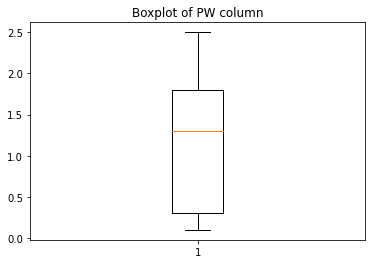

In [15]:
plt.boxplot(data['PW'])
plt.title('Boxplot of PW column')

In [24]:
x= data.drop(['Classification'],axis=1)
y=pd.DataFrame(data['Classification'])

In [25]:
data= pd.get_dummies(data)

data.head()

,SL,SW,PL,PW,Classification_Iris-setosa,Classification_Iris-versicolor,Classification_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,5.8,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [26]:
#splitting the data

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=42,train_size=0.2)

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

C:\Users\aryar\AppData\Local\Temp/ipykernel_6968/2643617984.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score,f1_score
print('Accuracy is : ', accuracy_score(y_test,y_pred))
print("Precision Score : ",precision_score(y_test, y_pred,average='weighted'))
print("Recall Score : ",recall_score(y_test, y_pred,average='weighted'))
print('F1 score is : ', f1_score(y_test,y_pred,average='weighted'))

Accuracy is :  0.9310344827586207
Precision Score :  0.9318837544790357
Recall Score :  0.9310344827586207
F1 score is :  0.9310577504769882


In [33]:
confusion_matrix(y_test,y_pred)

array([[39,  0,  0],
       [ 0, 35,  5],
       [ 0,  3, 34]], dtype=int64)

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        39
Iris-versicolor       0.92      0.88      0.90        40
 Iris-virginica       0.87      0.92      0.89        37

       accuracy                           0.93       116
      macro avg       0.93      0.93      0.93       116
   weighted avg       0.93      0.93      0.93       116



In [35]:
#KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier

# to find the optimum K Value
# For this we need to create the model with varied K Values
acc_values = []
neighbors = np.arange(3,15)
neighbors

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [39]:
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred = classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

C:\Users\aryar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\aryar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\aryar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\aryar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

In [40]:
acc_values

[0.8879310344827587,
 0.8879310344827587,
 0.8879310344827587,
 0.8879310344827587,
 0.8879310344827587,
 0.8879310344827587,
 0.8879310344827587,
 0.8879310344827587,
 0.8879310344827587,
 0.8879310344827587,
 0.8879310344827587,
 0.8879310344827587,
 0.9310344827586207,
 0.9396551724137931,
 0.8879310344827587,
 0.9396551724137931,
 0.9051724137931034,
 0.9137931034482759,
 0.9051724137931034,
 0.896551724137931,
 0.9137931034482759,
 0.9137931034482759,
 0.896551724137931,
 0.8879310344827587]

In [43]:
classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

C:\Users\aryar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [48]:
print('Accuracy is : ', accuracy_score(y_test,y_pred))
print("Precision Score : ",precision_score(y_test, y_pred, average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred,average='micro'))
print('F1 score is : ', f1_score(y_test,y_pred,average='micro'))
# for a good model - Accuracy and f1 score should be maximum positive

Accuracy is :  0.8879310344827587
Precision Score :  0.8879310344827587
Recall Score :  0.8879310344827587
F1 score is :  0.8879310344827587


In [49]:
confusion_matrix(y_test,y_pred)

array([[37,  2,  0],
       [ 0, 31,  9],
       [ 0,  2, 35]], dtype=int64)

In [50]:
data.describe()

,SL,SW,PL,PW,Classification_Iris-setosa,Classification_Iris-versicolor,Classification_Iris-virginica
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,5.867586,3.023448,3.847586,1.226897,0.317241,0.337931,0.344828
std,0.816827,0.374354,1.712265,0.758219,0.467015,0.474644,0.476960
min,4.300000,2.200000,1.000000,0.100000,0.000000,0.000000,0.000000
25%,5.200000,2.800000,1.600000,0.300000,0.000000,0.000000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,0.000000,0.000000,0.000000
75%,6.400000,3.200000,5.100000,1.800000,1.000000,1.000000,1.000000
max,7.900000,3.900000,6.900000,2.500000,1.000000,1.000000,1.000000


In [51]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [52]:
y_pred = dt_model.predict(x_test)
print('Accuracy on decision tree model',accuracy_score(y_test,y_pred))

Accuracy on decision tree model 0.9482758620689655


In [53]:
confusion_matrix(y_test,y_pred)

array([[37,  2,  0],
       [ 0, 38,  2],
       [ 0,  2, 35]], dtype=int64)

In [55]:
#SVM

In [58]:
from sklearn.svm import SVC
svm_linear = SVC(kernel = 'linear')
svm_linear.fit(x_train,y_train)

C:\Users\aryar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(kernel='linear')

In [59]:
y_pred = svm_linear.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9137931034482759
